In [26]:
import random
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from collections import Counter


In [27]:
CSV_FILE_PATH = '../Datasets/new_df_with_colors.csv'
CSV_FILE_PATH_VAL = '../Datasets/new_df_with_colors_val.csv'
###CSV_FILE_PATH = 'C:\\Users\\krybr\\iCloudDrive\\Documents\\JupyterNotebook\\Datasets\\OneForAll.csv'
###CSV_COLOR_FILE_PATH = '../Datasets/AllForColors.csv'
#CSV_FILE_PATH_RED = 'C:\\Users\\krybr\\iCloudDrive\\Documents\\JupyterNotebook\\Datasets\\new_all_red.csv'
#CSV_FILE_PATH_GREEN = 'C:\\Users\\krybr\\iCloudDrive\\Documents\\JupyterNotebook\\Datasets\\new_all_green.csv'
#CSV_FILE_PATH_BLUE = 'C:\\Users\\krybr\\iCloudDrive\\Documents\\JupyterNotebook\Datasets\\new_all_blues.csv'
#CSV__FILE_CATEGORIES = '../Datasets/categories.csv'


# load the training dataset

#lesion = pd.read_csv(CSV_FILE_PATH, usecols=lambda x: 'Unnamed' not in x)
#colors = pd.read_csv(CSV_COLOR_FILE_PATH, usecols=lambda x: 'Unnamed' not in x)
#lesion_red = pd.read_csv(CSV_FILE_PATH_RED, usecols=lambda x: 'Unnamed' not in x)
#lesion_red.rename(columns={col: col + '_r' for col in lesion_red.columns[1:103]}, inplace=True)
#lesion_green = pd.read_csv(CSV_FILE_PATH_GREEN, usecols=lambda x: 'Unnamed' not in x)
#lesion_green.rename(columns={col: col + '_g' for col in lesion_green.columns[1:103]}, inplace=True)
#lesion_blue = pd.read_csv(CSV_FILE_PATH_BLUE, usecols=lambda x: 'Unnamed' not in x)
#lesion_blue.rename(columns={col: col + '_b' for col in lesion_blue.columns[1:103]}, inplace=True)
#categories = pd.read_csv(CSV__FILE_CATEGORIES, usecols=lambda x: 'Unnamed' not in x)


#temp_col = lesion_blue['categories']

#lesion = lesion.drop(lesion.columns[-1], axis=1)
#lesion_red = lesion_red.drop(lesion_red.columns[-1], axis=1)
#lesion_green = lesion_green.drop(lesion_green.columns[-1], axis=1)

#columns = lesion_2.columns
#new_columns = [col + "_r" if i < 102 else col for i, col in enumerate(columns)]
#lesion_2.columns = new_columns

#merged_lesions = pd.merge(lesion.reset_index(), lesion_2.reset_index())
#merged_lesions = merged_lesions.drop(merged_lesions.columns[0], axis=1)
#moved_column = merged_lesions.pop('categories')
#merged_lesions.insert(204, 'categories', moved_column)

#merged_lesions = merged_lesions.reset_index(drop=True)
# Display a random sample of 10 observations
#sample = merged_lesions.sample(10)

#print(f"Shape of data: {sample.shape}")
#lesion_2
#merged_df = pd.merge(lesion, lesion_2, on='categories')

#merged_df = pd.merge(merged_df, lesion_3, on='categories')
#merged_df = pd.concat([lesion, lesion_2, lesion_3, temp_col], axis=1)

#df3 = pd.merge(lesion, lesion_red, on='common_column_name')



In [28]:
#df_all = pd.merge(lesion, colors, on='names')
#df_red = pd.merge(lesion, lesion_red, on='names')
#df_red_green = pd.merge(df_red, lesion_green, on='names')
#df_red_green_blue = pd.merge(df_red_green, lesion_blue, on='names')


In [29]:
#df = pd.DataFrame()
#df = pd.concat([df_all, categories], axis=1)
#df.to_csv("C:\\Users\\krybr\\iCloudDrive\\Documents\\JupyterNotebook\\Datasets\\OneForAll.csv")




In [30]:
df = pd.read_csv(CSV_FILE_PATH, usecols=lambda x: 'Unnamed' not in x)
df_val = pd.read_csv(CSV_FILE_PATH_VAL, usecols=lambda x: 'Unnamed' not in x)

In [31]:
df


,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape2D_Elongation_b,original_shape2D_MajorAxisLength_b,original_shape2D_MaximumDiameter_b,original_shape2D_MeshSurface_b,original_shape2D_MinorAxisLength_b,original_shape2D_Perimeter_b,original_shape2D_PerimeterSurfaceRatio_b,original_shape2D_PixelSurface_b,original_shape2D_Sphericity_b,category
0,143.0,198.0,2.632750e+09,1.854676,27.0,4.016258,240.0,174.142245,17.293814,178.0,...,0.724879,393.491881,473.367722,85415.0,285.234069,1428.663130,0.016726,85416.0,0.725174,2
1,148.0,207.0,1.078091e+09,1.968440,30.0,3.860437,245.0,181.061933,18.660349,185.0,...,0.845561,225.383334,241.006224,32324.5,190.575312,807.820418,0.024991,32325.0,0.788962,2
2,152.0,194.0,2.228989e+09,1.549723,21.0,4.867802,238.0,174.958985,13.218861,177.0,...,0.762987,349.350916,377.210816,72119.0,266.550217,1196.697618,0.016593,72120.0,0.795509,2
3,159.0,200.0,7.086332e+08,1.544139,22.0,4.798286,243.0,181.102027,13.116034,183.0,...,0.736443,194.543320,202.427765,21415.5,143.270119,631.470129,0.029487,21416.0,0.821516,2
4,110.0,185.0,2.336892e+09,2.250940,40.0,2.565735,235.0,148.008481,22.946195,148.0,...,0.908119,382.885745,407.305782,102933.5,347.705867,1279.082395,0.012426,102934.0,0.889170,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37811,107.0,167.0,2.971104e+08,1.871967,34.0,2.351650,192.0,131.952843,18.623338,127.0,...,0.713751,172.596334,179.245642,16582.5,123.190890,515.345238,0.031078,16583.0,0.885792,5
37812,73.0,144.0,3.082914e+08,2.016207,40.0,2.359573,189.0,100.385408,22.323536,91.0,...,0.838040,208.926626,216.688717,28618.5,175.088966,653.511760,0.022835,28619.0,0.917646,5
37813,88.0,156.0,2.160791e+08,1.944737,41.0,2.133270,187.0,116.537510,21.621974,110.0,...,0.857849,152.168004,158.672619,15195.5,130.537244,484.215295,0.031866,15196.0,0.902452,5
37814,87.0,152.0,2.210899e+08,1.830115,41.0,2.076690,168.0,111.769731,20.990009,103.0,...,0.799504,164.336425,171.732350,16901.5,131.387685,537.813275,0.031820,16902.0,0.856912,5


In [32]:
df_val

,original_firstorder_10Percentile,original_firstorder_90Percentile,original_firstorder_Energy,original_firstorder_Entropy,original_firstorder_InterquartileRange,original_firstorder_Kurtosis,original_firstorder_Maximum,original_firstorder_Mean,original_firstorder_MeanAbsoluteDeviation,original_firstorder_Median,...,original_shape2D_Elongation_b,original_shape2D_MajorAxisLength_b,original_shape2D_MaximumDiameter_b,original_shape2D_MeshSurface_b,original_shape2D_MinorAxisLength_b,original_shape2D_Perimeter_b,original_shape2D_PerimeterSurfaceRatio_b,original_shape2D_PixelSurface_b,original_shape2D_Sphericity_b,category
0,95.0,152.0,1.732030e+09,1.890115,31.0,2.585449,192.0,121.081493,17.878740,118.0,...,0.819030,426.720462,458.443017,114402.5,349.496827,1355.727056,0.011851,114403.0,0.884403,4
1,81.0,169.0,1.052841e+09,2.324632,61.0,1.743730,189.0,128.086137,29.810952,132.0,...,0.430759,424.288909,421.076003,60031.5,182.766073,1091.276262,0.018178,60032.0,0.795902,4
2,101.0,153.0,5.715280e+08,1.773241,33.0,2.048065,186.0,124.923260,17.135367,122.0,...,0.624163,273.443383,277.395025,35704.5,170.673263,784.322943,0.021967,35705.0,0.854027,6
3,91.0,188.0,1.483424e+09,2.515330,62.0,1.887613,224.0,137.420878,31.746040,135.0,...,0.861036,333.389067,346.873176,73360.5,287.059967,1117.727056,0.015236,73361.0,0.859014,0
4,81.0,167.0,1.597289e+09,2.395141,51.0,2.125963,194.0,122.326723,27.065350,120.0,...,0.706990,427.315137,460.508415,99842.5,302.107734,1322.077344,0.013242,99843.0,0.847239,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1098,77.0,144.0,8.896918e+08,1.860589,24.0,3.177175,178.0,114.108869,17.331385,116.0,...,0.755691,332.830473,339.802884,65601.5,251.517112,987.317893,0.015050,65602.0,0.919612,4
1099,60.0,126.0,5.192498e+07,1.918901,49.0,1.619281,156.0,94.541566,23.510057,98.0,...,0.820766,91.643744,93.621579,5400.5,75.218051,278.208153,0.051515,5401.0,0.936380,4
1100,109.0,179.0,1.120162e+09,2.111638,36.0,2.780685,196.0,146.371090,20.984646,147.0,...,0.685022,310.218024,331.058907,50674.5,212.506251,913.134126,0.018020,50675.0,0.873907,2
1101,85.0,167.0,1.400557e+09,2.288647,53.0,1.871787,202.0,124.474965,26.581276,123.0,...,0.592510,430.086158,423.817178,85218.5,254.830538,1184.219480,0.013896,85219.0,0.873856,4


In [33]:
Counter(df['category'])

Counter({4: 5822, 1: 5748, 3: 5350, 0: 5346, 6: 5335, 5: 5160, 2: 5055})

In [34]:
Counter(df_val['category'])

Counter({4: 883, 2: 88, 6: 46, 1: 35, 0: 30, 5: 13, 3: 8})

In [35]:
lesion_label = 'category'

column_names = df.columns.tolist()

feature_names = column_names[1:-1]

lesion_label = column_names[-1]


In [36]:
lesion_X, lesion_y = df[feature_names].values, df[lesion_label].values

temp = list(zip(lesion_X, lesion_y))
random.shuffle(temp)
res1, res2 = zip(*temp)
# res1 and res2 come out as tuples, and so must be converted to lists.
lesion_X, lesion_y = list(res1), list(res2)  

In [52]:
X = lesion_X[:150]
y = lesion_y[:150]

/Users/krystian/anaconda3/envs/scikit/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.605e+01, tolerance: 5.954e-02
  model = cd_fast.enet_coordinate_descent(


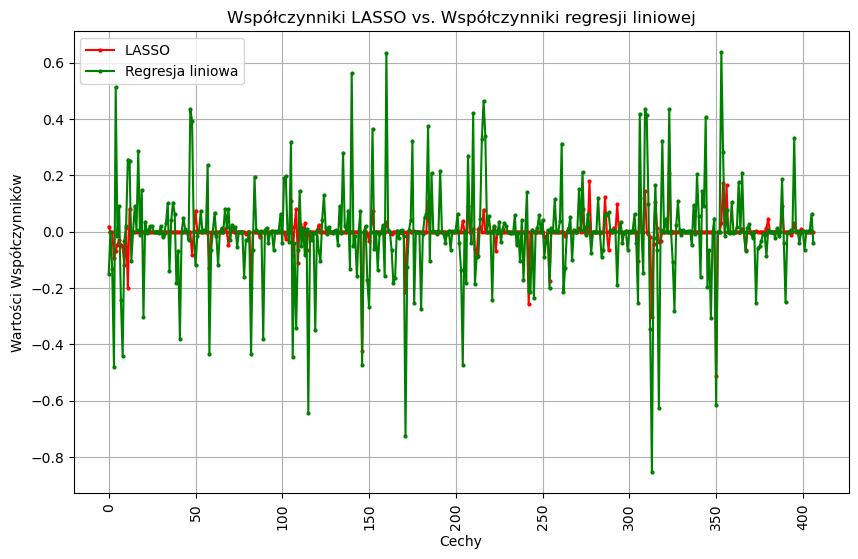

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, LinearRegression

# Load your dataset (replace with your own data)
# X = features, y = target variable

# Train Lasso Regression
lasso = Lasso(alpha=0.01)  # Set alpha (regularization strength)
lasso.fit(X, y)

# Train Linear Regression
lr = LinearRegression()
lr.fit(X, y)

# Visualize coefficients
plt.figure(figsize=(10, 6))
plt.plot(lasso.coef_, marker='o', markersize=2, color='red', label='LASSO')
plt.plot(lr.coef_, marker='o', markersize=2, color='green', label='Regresja liniowa')
plt.xticks(rotation=90)
plt.xlabel('Cechy')
plt.ylabel('Wartości Współczynników')
plt.title('Współczynniki LASSO vs. Współczynniki regresji liniowej')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
pipeline = Pipeline([
                     ('scaler',RobustScaler()),
                     ('model',Lasso())
])

search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, return_train_score=True, scoring="neg_mean_squared_error",verbose=3
                      )


In [13]:
search.fit(lesion_X,lesion_y)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
np.array(feature_names)[importance > 0]


Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV 1/5] END model__alpha=0.1;, score=(train=-2.466, test=-2.421) total time=  38.1s
[CV 2/5] END model__alpha=0.1;, score=(train=-2.463, test=-2.433) total time= 1.2min
[CV 3/5] END model__alpha=0.1;, score=(train=-2.450, test=-2.491) total time=  46.3s
[CV 4/5] END model__alpha=0.1;, score=(train=-2.462, test=-2.457) total time=  35.3s


/Users/krystian/anaconda3/envs/scikit/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.114e+04, tolerance: 1.199e+01
  model = cd_fast.enet_coordinate_descent(


[CV 5/5] END model__alpha=0.1;, score=(train=-2.447, test=-2.503) total time=16.6min
[CV 1/5] END model__alpha=0.2;, score=(train=-2.584, test=-2.535) total time=  38.6s
[CV 2/5] END model__alpha=0.2;, score=(train=-2.585, test=-2.555) total time= 1.4min
[CV 3/5] END model__alpha=0.2;, score=(train=-2.571, test=-2.603) total time= 1.3min
[CV 4/5] END model__alpha=0.2;, score=(train=-2.577, test=-2.578) total time=  46.2s
[CV 5/5] END model__alpha=0.2;, score=(train=-2.567, test=-2.626) total time=  16.9s
[CV 1/5] END model__alpha=0.30000000000000004;, score=(train=-2.751, test=-2.697) total time=  28.0s
[CV 2/5] END model__alpha=0.30000000000000004;, score=(train=-2.749, test=-2.725) total time=  30.8s
[CV 3/5] END model__alpha=0.30000000000000004;, score=(train=-2.744, test=-2.765) total time=  22.0s
[CV 4/5] END model__alpha=0.30000000000000004;, score=(train=-2.742, test=-2.746) total time=  11.8s
[CV 5/5] END model__alpha=0.30000000000000004;, score=(train=-2.731, test=-2.795) tota

array(['original_firstorder_Kurtosis',
       'original_firstorder_RootMeanSquared',
       'original_firstorder_Kurtosis_r', 'original_firstorder_Skewness_r',
       'original_glcm_ClusterProminence_r',
       'original_glcm_ClusterShade_r',
       'original_glrlm_LongRunLowGrayLevelEmphasis_r',
       'original_glrlm_ShortRunLowGrayLevelEmphasis_r',
       'original_glszm_LargeAreaEmphasis_r',
       'original_glszm_LargeAreaHighGrayLevelEmphasis_r',
       'original_glszm_SmallAreaLowGrayLevelEmphasis_r',
       'original_ngtdm_Coarseness_r',
       'original_firstorder_10Percentile_g',
       'original_glcm_ClusterProminence_g', 'original_glcm_MCC_g',
       'original_glcm_ClusterProminence_b',
       'original_glcm_ClusterShade_b',
       'original_gldm_LargeDependenceHighGrayLevelEmphasis_b',
       'original_glrlm_LowGrayLevelRunEmphasis_b',
       'original_glszm_LargeAreaHighGrayLevelEmphasis_b',
       'original_glszm_SmallAreaLowGrayLevelEmphasis_b'], dtype='<U52')